In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# DATSETS READING 

In [2]:
df2019 = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\2019_tocombine.xlsx')
df2019.head()


,Ticket Number,Booking creation time_x,PAX type,Origin,Destination,Departure Date,Departure Time,Arrival Date,Arrival Time,Fare Basis Code cut,...,SMS Total Org,GDS Total Org,Org Issuer Company,Org Distribution Channel,Full Name,Booking creation time_y,Contact person email,Booking creation day,Booking Hour,Type
0,2482100288006,2018-06-05,Adult,SGD,CPH,2019-02-04,09:30,2019-02-04,10:15,NaN,...,599.0,0.0,homepage,6I,kirsten lauritzen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
1,2482100288006,2018-06-05,Adult,CPH,SGD,2019-02-19,08:15,2019-02-19,09:00,NaN,...,699.0,0.0,homepage,6I,kirsten lauritzen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
2,2482100288007,2018-06-05,Adult,SGD,CPH,2019-02-04,09:30,2019-02-04,10:15,NaN,...,599.0,0.0,homepage,6I,gerhard nissen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
3,2482100288007,2018-06-05,Adult,CPH,SGD,2019-02-19,08:15,2019-02-19,09:00,NaN,...,699.0,0.0,homepage,6I,gerhard nissen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
4,2482100288010,2018-06-05,Adult,SGD,CPH,2019-02-04,09:30,2019-02-04,10:15,NaN,...,349.0,0.0,homepage,6I,michelle lauritzen frøhlich,2018-06-05 16:54:18,Michelle-12@live.dk,2018-06-05,16,Leisure


In [3]:
df2019.shape

(57840, 21)

In [4]:
df2022 = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\2022_tocombine.xlsx')
df2022.head()

,Ticket Number,Booking creation time_x,PAX type,Origin,Destination,Departure Date,Departure Time,Arrival Date,Arrival Time,Fare Basis Code cut,...,SMS Total Org,GDS Total Org,Org Issuer Company,Org Distribution Channel,Full Name,Booking creation time_y,Contact person email,Booking creation day,Booking Hour,Type
0,2482100362471,2021-07-16,Adult,CPH,SGD,2022-03-20,19:00,2022-03-20,19:45,PLU,...,749.0,0.0,Ecommerce,6I,dorthe vendelbo jensen,2021-07-16 17:24:10,vendel@stofanet.dk,2021-07-16,17,Business
1,2482100364603,2021-08-13,Adult,SGD,CPH,2022-03-09,07:00,2022-03-09,07:45,PLU,...,749.0,0.0,Ecommerce,6I,thomas dehnfeld,2021-08-13 12:52:32,td@kf17.dk,2021-08-13,12,Business
2,2482100364603,2021-08-13,Adult,CPH,SGD,2022-03-15,18:00,2022-03-15,18:45,PLU,...,749.0,0.0,Ecommerce,6I,thomas dehnfeld,2021-08-13 12:52:32,td@kf17.dk,2021-08-13,12,Business
3,2482100364604,2021-08-13,Adult,SGD,CPH,2022-03-09,07:00,2022-03-09,07:45,PLU,...,749.0,0.0,Ecommerce,6I,jane dehnfeld,2021-08-13 12:52:32,td@kf17.dk,2021-08-13,12,Business
4,2482100364604,2021-08-13,Adult,CPH,SGD,2022-03-15,18:00,2022-03-15,18:45,PLU,...,749.0,0.0,Ecommerce,6I,jane dehnfeld,2021-08-13 12:52:32,td@kf17.dk,2021-08-13,12,Business


In [5]:
df2022.shape

(33473, 21)

# MERGING THE DATASETS

In [6]:
final=pd.concat([df2019,df2022])
final.head()

,Ticket Number,Booking creation time_x,PAX type,Origin,Destination,Departure Date,Departure Time,Arrival Date,Arrival Time,Fare Basis Code cut,...,SMS Total Org,GDS Total Org,Org Issuer Company,Org Distribution Channel,Full Name,Booking creation time_y,Contact person email,Booking creation day,Booking Hour,Type
0,2482100288006,2018-06-05,Adult,SGD,CPH,2019-02-04 00:00:00,09:30,2019-02-04,10:15,NaN,...,599.0,0.0,homepage,6I,kirsten lauritzen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
1,2482100288006,2018-06-05,Adult,CPH,SGD,2019-02-19 00:00:00,08:15,2019-02-19,09:00,NaN,...,699.0,0.0,homepage,6I,kirsten lauritzen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
2,2482100288007,2018-06-05,Adult,SGD,CPH,2019-02-04 00:00:00,09:30,2019-02-04,10:15,NaN,...,599.0,0.0,homepage,6I,gerhard nissen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
3,2482100288007,2018-06-05,Adult,CPH,SGD,2019-02-19 00:00:00,08:15,2019-02-19,09:00,NaN,...,699.0,0.0,homepage,6I,gerhard nissen,2018-06-05 16:47:24,Kirstenlauritzen@live.dk,2018-06-05,16,Leisure
4,2482100288010,2018-06-05,Adult,SGD,CPH,2019-02-04 00:00:00,09:30,2019-02-04,10:15,NaN,...,349.0,0.0,homepage,6I,michelle lauritzen frøhlich,2018-06-05 16:54:18,Michelle-12@live.dk,2018-06-05,16,Leisure


# FEAUTURE ENGINEERING

In [7]:
final=final.rename(columns={"Fare Basis Code cut": "Fare", "Org Distribution Channel": "Channel"})

In [8]:
final.shape
final.isnull().sum()

Ticket Number                  0
Booking creation time_x        0
PAX type                     844
Origin                         0
Destination                    0
Departure Date                 0
Departure Time                 0
Arrival Date                 137
Arrival Time                 137
Fare                         575
Fare Basis Code                0
SMS Total Org                  0
GDS Total Org                  0
Org Issuer Company           125
Channel                      125
Full Name                      0
Booking creation time_y        0
Contact person email       18797
Booking creation day           0
Booking Hour                   0
Type                       18797
dtype: int64

## HANDLING DATA TYPES, EXTRACTING DAYS, MONTHS ETC. 

In [9]:
#Arrival Date is the same as Departure Date so we can assign the same
final['Arrival Date'] = final['Arrival Date'].fillna(final['Departure Date'])
#flight takes 45min therefore arrival time= departure time + 45 minutes
final["Departure Time"] = pd.to_datetime(final["Departure Time"])
final['Arrival Time2']=final['Departure Time']+ timedelta(minutes=45)
final['Arrival Time'] = final['Arrival Time'].fillna(final['Arrival Time2'])
del final['Arrival Time2']
final.isnull().sum()

Ticket Number                  0
Booking creation time_x        0
PAX type                     844
Origin                         0
Destination                    0
Departure Date                 0
Departure Time                 0
Arrival Date                   0
Arrival Time                   0
Fare                         575
Fare Basis Code                0
SMS Total Org                  0
GDS Total Org                  0
Org Issuer Company           125
Channel                      125
Full Name                      0
Booking creation time_y        0
Contact person email       18797
Booking creation day           0
Booking Hour                   0
Type                       18797
dtype: int64

In [10]:
del final['Channel'], final['Contact person email'], final ['Org Issuer Company'], final['Full Name'], final ['Fare Basis Code'], final['Ticket Number'], final['Destination']

In [11]:
#FEATURE ENGINEERING
final['Departure Date']=pd.to_datetime(final['Departure Date'])
final['Arrival Date']=pd.to_datetime(final['Arrival Date'])
final['Booking creation day']=pd.to_datetime(final['Booking creation day'])
final['Departure Time']=pd.to_datetime(final['Departure Time'])
final['Arrival Time']=pd.to_datetime(final['Arrival Time'])
final['Booking creation time_y']=pd.to_datetime(final['Booking creation time_y'])

final['Day of flight']=pd.to_datetime(final['Departure Date']).dt.day
final['Month of flight']=pd.to_datetime(final['Departure Date']).dt.month
#final['Year of flight']=pd.to_datetime(final['Departure Date']).dt.year
#final['Week of flight']= pd.to_datetime(final['Departure Date']).dt.isocalendar().week

final['Departure hour']=pd.to_datetime(final['Departure Time']).dt.hour
#final['Departure minutes']=pd.to_datetime(final['Departure Time']).dt.minute
#final['Arrival hour']=pd.to_datetime(final['Arrival Time']).dt.hour
#final['Arrival minutes']=pd.to_datetime(final['Arrival Time']).dt.minute


final['Days before']=final['Departure Date']-final["Booking creation day"]

#final['Day of booking']=pd.to_datetime(final['Booking creation day']).dt.day
#final['Weekday of booking']=pd.to_datetime(final['Booking creation day']).dt.weekday
#final['Week of booking']= pd.to_datetime(final['Booking creation day']).dt.isocalendar().week
#final['Month of booking']=pd.to_datetime(final['Booking creation day']).dt.month
#final['Year of booking']=pd.to_datetime(final['Booking creation day']).dt.year
#final['Booking hour']=pd.to_datetime(final['Booking creation time_y']).dt.hour
#final['Booking minutes']=pd.to_datetime(final['Booking creation time_y']).dt.minute


final.head()

,Booking creation time_x,PAX type,Origin,Departure Date,Departure Time,Arrival Date,Arrival Time,Fare,SMS Total Org,GDS Total Org,Booking creation time_y,Booking creation day,Booking Hour,Type,Day of flight,Month of flight,Departure hour,Days before
0,2018-06-05,Adult,SGD,2019-02-04,2023-04-18 09:30:00,2019-02-04,2023-04-18 10:15:00,NaN,599.0,0.0,2018-06-05 16:47:24,2018-06-05,16,Leisure,4,2,9,244 days
1,2018-06-05,Adult,CPH,2019-02-19,2023-04-18 08:15:00,2019-02-19,2023-04-18 09:00:00,NaN,699.0,0.0,2018-06-05 16:47:24,2018-06-05,16,Leisure,19,2,8,259 days
2,2018-06-05,Adult,SGD,2019-02-04,2023-04-18 09:30:00,2019-02-04,2023-04-18 10:15:00,NaN,599.0,0.0,2018-06-05 16:47:24,2018-06-05,16,Leisure,4,2,9,244 days
3,2018-06-05,Adult,CPH,2019-02-19,2023-04-18 08:15:00,2019-02-19,2023-04-18 09:00:00,NaN,699.0,0.0,2018-06-05 16:47:24,2018-06-05,16,Leisure,19,2,8,259 days
4,2018-06-05,Adult,SGD,2019-02-04,2023-04-18 09:30:00,2019-02-04,2023-04-18 10:15:00,NaN,349.0,0.0,2018-06-05 16:54:18,2018-06-05,16,Leisure,4,2,9,244 days


In [12]:
final.isnull().sum()

Booking creation time_x        0
PAX type                     844
Origin                         0
Departure Date                 0
Departure Time                 0
Arrival Date                   0
Arrival Time                   0
Fare                         575
SMS Total Org                  0
GDS Total Org                  0
Booking creation time_y        0
Booking creation day           0
Booking Hour                   0
Type                       18797
Day of flight                  0
Month of flight                0
Departure hour                 0
Days before                    0
dtype: int64

In [130]:
final.drop(['Arrival Time'], axis=1, inplace=True)
final.drop(['Departure Time'], axis=1, inplace=True)
#final.drop(['Departure Date'], axis=1, inplace=True)
final.drop(['Arrival Date'], axis=1, inplace=True)
#final.drop(['Booking creation day'], axis=1, inplace=True)
final.drop(['Booking creation time_x'], axis=1, inplace=True)
final.drop(['Booking creation time_y'], axis=1, inplace=True)
final.drop(['Booking Hour'], axis=1, inplace=True)
final.drop(['Departure Date'], axis=1, inplace=True)
final.drop(['Booking creation day'], axis=1, inplace=True)
final.drop(['Type'], axis=1, inplace=True)


In [131]:
final.head()

,PAX type,Origin,Fare,SMS Total Org,GDS Total Org,Day of flight,Month of flight,Departure hour,Days before
0,Adult,SGD,NaN,599.0,0.0,4,2,9,244 days
1,Adult,CPH,NaN,699.0,0.0,19,2,8,259 days
2,Adult,SGD,NaN,599.0,0.0,4,2,9,244 days
3,Adult,CPH,NaN,699.0,0.0,19,2,8,259 days
4,Adult,SGD,NaN,349.0,0.0,4,2,9,244 days


##  CHECKING PRICE VALUES

In [132]:
#NO 0 values


#Checking if values are below 0
print(final['SMS Total Org'].where(final['SMS Total Org'] <= 0).sum())
#check the column average
print(final['SMS Total Org'].mean())
print(final['GDS Total Org'].mean()) #WE can see that tickets bought on distribution channel are significantly higher

0.0
434.40542474784536
3227.376455852642


In [133]:
final.drop(['GDS Total Org'], axis=1, inplace=True)
final.drop(['SMS Total Org'], axis=1, inplace=True)

# CHANGE ORIGIN VALUES TO boolean 

In [134]:
final=final.replace({'Origin': {'SGD': True, 'CPH': False}})

# CHANGE pax type to int values

In [135]:
final['PAX type'] = final['PAX type'].replace(['Adult'], '0')
final['PAX type'] = final['PAX type'].replace(['Child'], '1')
final['PAX type'] = final['PAX type'].replace(['Infant'], '2')
print(final['PAX type'].value_counts()) #more than 90% is adult therefore we can easily estimate that majority of missing values will be adults
final['PAX type']=final['PAX type'].fillna(0)
final['PAX type'] = final['PAX type'].astype(int)
final.head()


0    88032
1     2435
2        2
Name: PAX type, dtype: int64


,PAX type,Origin,Fare,Day of flight,Month of flight,Departure hour,Days before
0,0,True,NaN,4,2,9,244 days
1,0,False,NaN,19,2,8,259 days
2,0,True,NaN,4,2,9,244 days
3,0,False,NaN,19,2,8,259 days
4,0,True,NaN,4,2,9,244 days


In [136]:
final['Days before'] = (final['Days before'] / np.timedelta64(1, 'D')).astype(int)

In [137]:
final['Fare'].value_counts()
#WE are only interested in basic, plus, student, senior, premium as those alsie express offer (based on interview with CCO)
Fare= final[['Fare']]
Current_Fare_List=Fare['Fare']
New_Fare_List=[]

for fare in Current_Fare_List:
    if fare in ['STU', 'BAS', 'PLU', 'PRE', 'SEN']:
        New_Fare_List.append(fare)
    else: 
        New_Fare_List.append('Other')
        
Fare['Fare'] = pd.DataFrame(New_Fare_List)
Fare['Fare'].value_counts()
del final['Fare']
final=pd.concat([final, Fare],axis=1)
final.head()

C:\Users\basia\AppData\Local\Temp\ipykernel_5340\2562374089.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fare['Fare'] = pd.DataFrame(New_Fare_List)


,PAX type,Origin,Day of flight,Month of flight,Departure hour,Days before,Fare
0,0,True,4,2,9,244,Other
1,0,False,19,2,8,259,Other
2,0,True,4,2,9,244,Other
3,0,False,19,2,8,259,Other
4,0,True,4,2,9,244,Other


In [138]:
final['Fare'] = final['Fare'].replace(['BAS'], '0')
final['Fare'] = final['Fare'].replace(['PLU'], '1')
final['Fare'] = final['Fare'].replace(['STU'], '2')
final['Fare'] = final['Fare'].replace(['SEN'], '3')
final['Fare'] = final['Fare'].replace(['PRE'], '4')
final['Fare'] = final['Fare'].replace(['Other'], '5')
final['Fare'] = final['Fare'].astype(int)
final.head()

,PAX type,Origin,Day of flight,Month of flight,Departure hour,Days before,Fare
0,0,True,4,2,9,244,5
1,0,False,19,2,8,259,5
2,0,True,4,2,9,244,5
3,0,False,19,2,8,259,5
4,0,True,4,2,9,244,5


In [139]:
final.shape

(91313, 7)

In [140]:
del final['Fare']
del final['PAX type']

In [141]:
#to show how many people bought with the same specifics
final=final.groupby(final.columns.tolist(),as_index=False).size()

In [142]:
final=final.rename(columns={"size": "Output"})
final.head()


,Origin,Day of flight,Month of flight,Departure hour,Days before,Output
0,False,1,1,16,1,2
1,False,1,1,16,2,3
2,False,1,1,16,4,1
3,False,1,1,16,5,2
4,False,1,1,16,6,1


In [143]:
final.shape

(52719, 6)

In [ ]:
#add departure data as a date column 

# TRAINING MODEL  

## logistic regression

In [144]:
X=final.iloc[:, : -1]
y=final.iloc[:,  -1]
print(X.shape,y.shape)

(52719, 5) (52719,)


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [149]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test) 
acc = accuracy_score(y_test,y_pred)
acc

0.5963581183611533

In [113]:
predict= pd.DataFrame({'PAX type': [0],
                   'Origin': [True],
                   'Day of flight': [2],
                      'Month of flight': [6], 
                      'Departure hour': [9], 
                      'Days before': [7], 'Fare':[1]})

y_predict=model.predict(predict)
print(y_predict)


[1]


In [93]:
for i in final['PAX type'].unique(): 
    for i in final['Origin'].unique():
        for i in final['Day of flight'].unique():
            
            predict= pd.DataFrame({'PAX type': [0],
                       'Origin': [i],
                   'Day of flight': [2],
                      'Month of flight': [6], 
                      'Departure hour': [9], 
                      'Days before': [4],
                      'Fare': 0})
            y_predict=model.predict(predict)
           


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


## ENCODING VALUES

In [13]:
final['Fare'].value_counts()
#WE are only interested in basic, plus, student, senior, premium as those alsie express offer (based on interview with CCO)
Fare= final[['Fare']]
Current_Fare_List=Fare['Fare']
New_Fare_List=[]

for fare in Current_Fare_List:
    if fare in ['STU', 'BAS', 'PLU', 'PRE', 'SEN']:
        New_Fare_List.append(fare)
    else: 
        New_Fare_List.append('Other')
        
Fare['Fare'] = pd.DataFrame(New_Fare_List)
Fare['Fare'].value_counts()


C:\Users\basia\AppData\Local\Temp\ipykernel_11796\2732236000.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fare['Fare'] = pd.DataFrame(New_Fare_List)


BAS      35039
Other    21186
PLU      20748
STU       7824
SEN       5471
PRE       1045
Name: Fare, dtype: int64

In [19]:
#Performing ONE HOT ENCODING (Converting categorical values)

Fare = pd.get_dummies(Fare, drop_first=False)
Fare.head(-5)

,Fare_BAS,Fare_Other,Fare_PLU,Fare_PRE,Fare_SEN,Fare_STU
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
33463,1,0,0,0,0,0
33464,0,0,1,0,0,0
33465,1,0,0,0,0,0
33466,1,0,0,0,0,0


In [85]:
#We do not need duration as each flight is 45 minutes, therefore it does not influence the potential demand nor price

In [86]:
#PERFROMING HOT ENCODING ON PAX TYPE, does not need to create anything like other 
final['PAX type'].value_counts()


Adult     88032
Child      2435
Infant        2
Name: PAX type, dtype: int64

In [87]:
PAX_type= final[['PAX type']]
PAX_type = pd.get_dummies(PAX_type, drop_first=False)
PAX_type.head()

,PAX type_Adult,PAX type_Child,PAX type_Infant
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [90]:
final['Type'].value_counts()

Business    47254
Leisure     25262
Name: Type, dtype: int64

In [91]:
Type= final[['Type']]
Type = pd.get_dummies(Type, drop_first=False)
Type.head()

,Type_Business,Type_Leisure
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
#Adding encoded columns to our final dataset
final=pd.concat([final,Fare, PAX_type, Channel, Type], axis=1)
final.shape



(91313, 38)

In [93]:
#Deleting non-encoded values
final.drop([ "PAX type", "Type", "Fare"], axis=1, inplace= True)

## adding holidays column

In [94]:
#final["Holiday"] = np.nan
Holidays= ((final['Departure Date'] > '2019-07-01') & (final['Departure Date'] <= '2019-08-31'))  
Holidays2 = ((final['Departure Date'] > '2022-07-01') & (final['Departure Date'] <= '2022-08-31'))
print(Holidays.values.sum())
print(Holidays2.values.sum())

8139
4590


In [95]:
Christmas = ((final['Departure Date'] > '2019-12-20') & (final['Departure Date'] <= '2019-12-31'))  
Christmas2 = ((final['Departure Date'] > '2022-12-20') & (final['Departure Date'] <= '2022-12-31'))
print(Christmas.values.sum())
print(Christmas2.values.sum())

946
814


In [96]:
final['Holidays2019'] = np.select([final['Departure Date'].lt('2019-07-01'),  
                             final['Departure Date'].gt('2019-08-31')], 
                            [0,0], 
                            default=1)
final['Holidays2022'] = np.select([final['Departure Date'].lt('2022-07-01'),  
                             final['Departure Date'].gt('2022-08-31')], 
                            [0,0], 
                            default=1)
final['Holidays']=final['Holidays2019']+final['Holidays2022']
del final['Holidays2019']
del final['Holidays2022']
final.head()


,Departure Date,SMS Total Org,Booking creation day,Day of flight,Month of flight,Year of flight,Week of flight,Departure hour,Departure minutes,Arrival hour,...,PAX type_Adult,PAX type_Child,PAX type_Infant,Channel_1A,Channel_1G,Channel_1S,Channel_6I,Type_Business,Type_Leisure,Holidays
0,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,0
1,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,1,0,0,0,0,0,1,0,1,0
2,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,0
3,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,1,0,0,0,0,0,1,0,1,0
4,2019-02-04,349.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,0


In [97]:
final['Christmas2019'] = np.select([final['Departure Date'].lt('2019-12-20'),  
                             final['Departure Date'].gt('2019-12-31')], 
                            [0,0], 
                            default=1)
final['Christmas2022'] = np.select([final['Departure Date'].lt('2022-12-20'),  
                             final['Departure Date'].gt('2022-12-31')], 
                            [0,0], 
                            default=1)
final['Christmas']=final['Christmas2019']+final['Christmas2022']
del final['Christmas2019']
del final['Christmas2022']
final.head()

,Departure Date,SMS Total Org,Booking creation day,Day of flight,Month of flight,Year of flight,Week of flight,Departure hour,Departure minutes,Arrival hour,...,PAX type_Child,PAX type_Infant,Channel_1A,Channel_1G,Channel_1S,Channel_6I,Type_Business,Type_Leisure,Holidays,Christmas
0,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0
1,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,0,0,0,0,0,1,0,1,0,0
2,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0
3,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,0,0,0,0,0,1,0,1,0,0
4,2019-02-04,349.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0


In [98]:
final['Christmas'].values.sum()

2048

In [99]:
print(final.shape)
final.head()

(91313, 36)


,Departure Date,SMS Total Org,Booking creation day,Day of flight,Month of flight,Year of flight,Week of flight,Departure hour,Departure minutes,Arrival hour,...,PAX type_Child,PAX type_Infant,Channel_1A,Channel_1G,Channel_1S,Channel_6I,Type_Business,Type_Leisure,Holidays,Christmas
0,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0
1,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,0,0,0,0,0,1,0,1,0,0
2,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0
3,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,0,0,0,0,0,1,0,1,0,0
4,2019-02-04,349.0,2018-06-05,4,2,2019,6,9,30,10,...,0,0,0,0,0,1,0,1,0,0


# LOOKING WHICH PARAMETERS INFLUENCE PRICE CHANGE THE MOST

In [100]:
final2=final.copy() #just in case ;)

In [102]:
final['Days before'] = (final['Days before'] / np.timedelta64(1, 'D')).astype(int)

In [103]:
final.dtypes

Departure Date          datetime64[ns]
SMS Total Org                  float64
Booking creation day    datetime64[ns]
Day of flight                    int64
Month of flight                  int64
Year of flight                   int64
Week of flight                  UInt32
Departure hour                   int64
Departure minutes                int64
Arrival hour                     int64
Arrival minutes                  int64
Days before                      int32
Day of booking                   int64
Weekday of booking               int64
Week of booking                 UInt32
Month of booking                 int64
Year of booking                  int64
Booking hour                     int64
Booking minutes                  int64
Fare_BAS                         uint8
Fare_Other                       uint8
Fare_PLU                         uint8
Fare_PRE                         uint8
Fare_SEN                         uint8
Fare_STU                         uint8
PAX type_Adult           

In [104]:

#We are not going to see which features the most influence price change

In [105]:
X= final.loc[:, ["Day of flight", "Month of flight", "Year of flight", "Week of flight", "Departure hour", "Departure minutes",
"Arrival hour", "Arrival minutes", "Days before", "Day of booking", "Weekday of booking", "Week of booking", "Month of booking",
"Year of booking", "Booking hour", "Booking minutes", "Fare_BAS", "Fare_Other", "Fare_PLU", "Fare_PRE", "Fare_SEN", "Fare_STU",
"PAX type_Adult", "PAX type_Child", "PAX type_Infant", "Channel_1A", "Channel_1G", "Channel_1S", "Channel_6I", "Type_Business", "Type_Leisure", "Holidays", "Christmas"]]
y= final.iloc[:,1]

print(X.shape, y.shape)
y

(91313, 33) (91313,)


0        599.0
1        699.0
2        599.0
3        699.0
4        349.0
         ...  
33468      0.0
33469      0.0
33470      0.0
33471      0.0
33472      0.0
Name: SMS Total Org, Length: 91313, dtype: float64

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)



ExtraTreesRegressor()

In [107]:
print(selection.feature_importances_)

[2.54467740e-02 1.43707224e-02 1.45091961e-02 2.04956247e-02
 1.73469913e-02 1.02046100e-02 2.46341199e-02 9.26388298e-03
 7.53909454e-02 2.40444027e-02 2.51896442e-02 1.90090713e-02
 1.54572943e-02 1.05689018e-02 2.89794445e-02 2.85046586e-02
 7.01009203e-03 8.18520016e-03 6.94746155e-03 7.16963979e-03
 9.79689298e-03 1.16003200e-02 3.40487224e-03 2.39342579e-03
 6.52328324e-07 8.51158144e-07 5.62081759e-06 1.08557881e-06
 5.26849208e-01 4.10732190e-02 1.71691361e-03 8.67613103e-03
 1.75212960e-03]


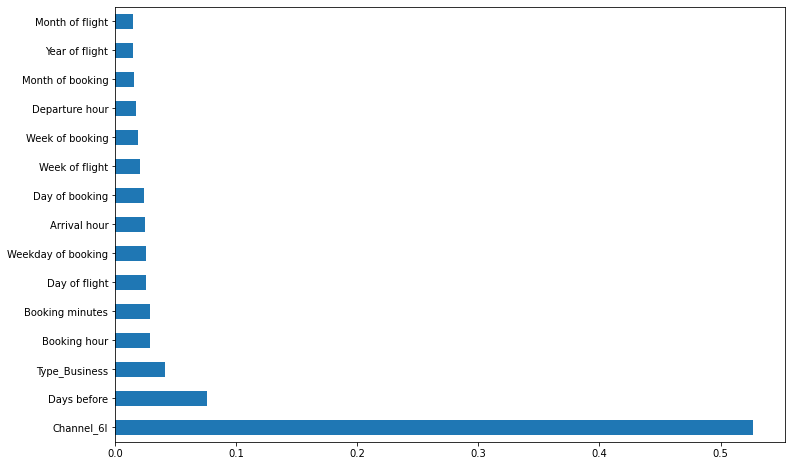

In [110]:
#plot

plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind="barh")
plt.show()

In [45]:
#MODEL TRAIN

# PLOTTING FLIGHTS PER WEEK/MONTH

In [47]:
#WHAT IS THE PURPOSE OF PREDICTION?
#TIME SERIES FORECASTING for demand forecast
#how many tickets will be sold per (week/month/hour of a day) based on different parameters 

#plan: Neural Networks, Random Forest

<AxesSubplot:>

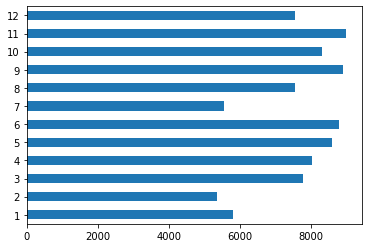

In [48]:
final["Month of flight"].value_counts().sort_index().plot(kind="barh")


<AxesSubplot:>

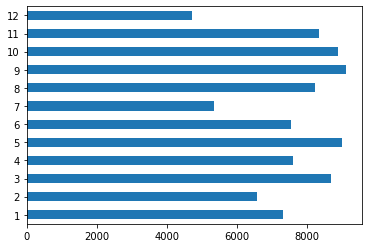

In [49]:
final["Month of booking"].value_counts().sort_index().plot(kind="barh")

In [50]:
a=final['Week of flight'].value_counts(sort=False).index.tolist()
b=final['Week of flight'].value_counts(sort=False).tolist()


In [149]:
df=pd.DataFrame(list(zip(a,b)))


<AxesSubplot:xlabel='Week'>

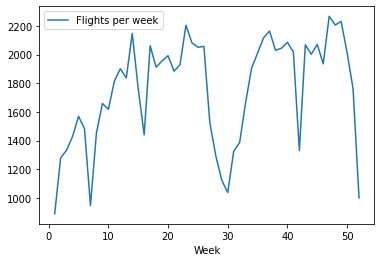

In [52]:
df.columns=['Week','Flights per week']
df=df.sort_values(by=['Week'])
df.plot(x='Week', y='Flights per week')

# PLOTTING FLIGHTS PER DAY

In [112]:
#add how many tickets bought for each day flight
x=final["Departure Date"].value_counts().sort_index()
final3=final.copy()
x1=x.to_dict()
x1

final3['Count_per_date'] = final["Departure Date"].map(x1)
print(final3.head())
final3.shape


  Departure Date  SMS Total Org Booking creation day  Day of flight  \
0     2019-02-04          599.0           2018-06-05              4   
1     2019-02-19          699.0           2018-06-05             19   
2     2019-02-04          599.0           2018-06-05              4   
3     2019-02-19          699.0           2018-06-05             19   
4     2019-02-04          349.0           2018-06-05              4   

   Month of flight  Year of flight  Week of flight  Departure hour  \
0                2            2019               6               9   
1                2            2019               8               8   
2                2            2019               6               9   
3                2            2019               8               8   
4                2            2019               6               9   

   Departure minutes  Arrival hour  ...  PAX type_Infant  Channel_1A  \
0                 30            10  ...                0           0   
1       

(91313, 37)

In [69]:
final3.head()

,Departure Date,SMS Total Org,Booking creation day,Day of flight,Month of flight,Year of flight,Week of flight,Departure hour,Departure minutes,Arrival hour,...,PAX type_Adult,PAX type_Child,PAX type_Infant,Channel_1A,Channel_1G,Channel_1S,Channel_6I,Type_Business,Type_Leisure,Count_per_date
0,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,178
1,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,1,0,0,0,0,0,1,0,1,186
2,2019-02-04,599.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,178
3,2019-02-19,699.0,2018-06-05,19,2,2019,8,8,15,9,...,1,0,0,0,0,0,1,0,1,186
4,2019-02-04,349.0,2018-06-05,4,2,2019,6,9,30,10,...,1,0,0,0,0,0,1,0,1,178


In [87]:
mask = (final3['Departure Date'] < '2019-12-31')
final2019=final3.loc[mask]
#final2019=final2019.drop_duplicates(subset=['Count_per_date'])

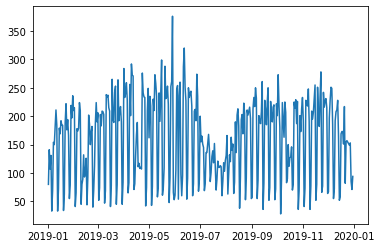

In [88]:
final2019=final2019.sort_values(by=['Departure Date'])
plt.plot(final2019['Departure Date'],final2019['Count_per_date']) #does not work

In [89]:
mask = ((final3['Departure Date'] > '2021-12-31 23:00:00') & (final3['Departure Date'] < '2022-12-31'))
final2022=final3.loc[mask]

#final2022=final2022.drop_duplicates(subset=['Count_per_date'])

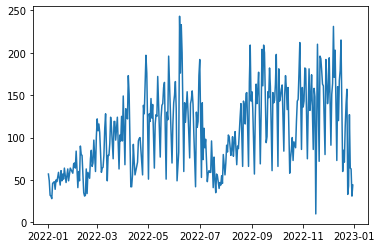

In [97]:
final2022=final2022.sort_values(by=['Departure Date'])
plt.plot(final2022['Departure Date'],final2022['Count_per_date']) 

In [96]:
print(final2022['Count_per_date'].where(final2022['Count_per_date'] ==0).sum())

0.0


# PLOTTING BOOKING FOR X-days PERIOD AT Y BOOKING DAY 

In [124]:
#lets try to visualise how many tickets were bought on particular day for the next 2 weeks lets say 10.03.2019 :)
a='2022-06-24'
b='2022-07-11'
mask = ((final3['Booking creation day'] == a) & (final3['Departure Date'] <= b))
idk=final3.loc[mask]
idk=idk.reset_index()


<BarContainer object of 67 artists>

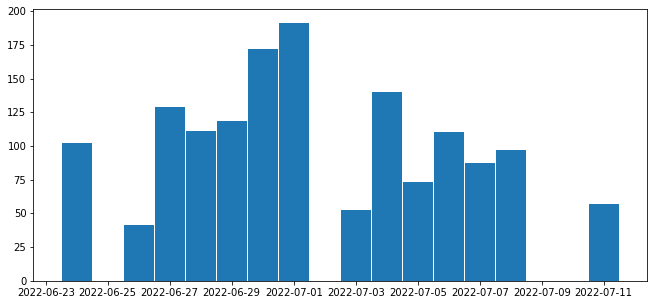

In [125]:
idk=idk.sort_values(by=['Departure Date'])
fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(idk['Departure Date'],idk['Count_per_date'], width=1, edgecolor="white", linewidth=1)

In [117]:
idk['Count_per_date'].sum() #at the partical date this tickets were bought

769

In [ ]:
#so we want to show this demand for each day, predict it for upcoming years and switch the bars depending on prices

In [ ]:
#idea

#generate a platfrom where manually user can set a date and a future period (like here 14 days) and show the graph like above
#prediction: show how it might look in the future year for specific date and period (like here 14 days)

#another idea, show above each histogram avarage price per day 
#manually set % of increasing/decreasing the price and show how the histogram behaves

In [1]:
final3.to_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\mergedfinal.xlsx')  

NameError: name 'final3' is not defined